### Quantization : Intensity levels
#### How many intensity levels are in an image?
Number of intensity levels = 2^(number of bits assigned to one pixel)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


[18 34 60]
[16 32 48]


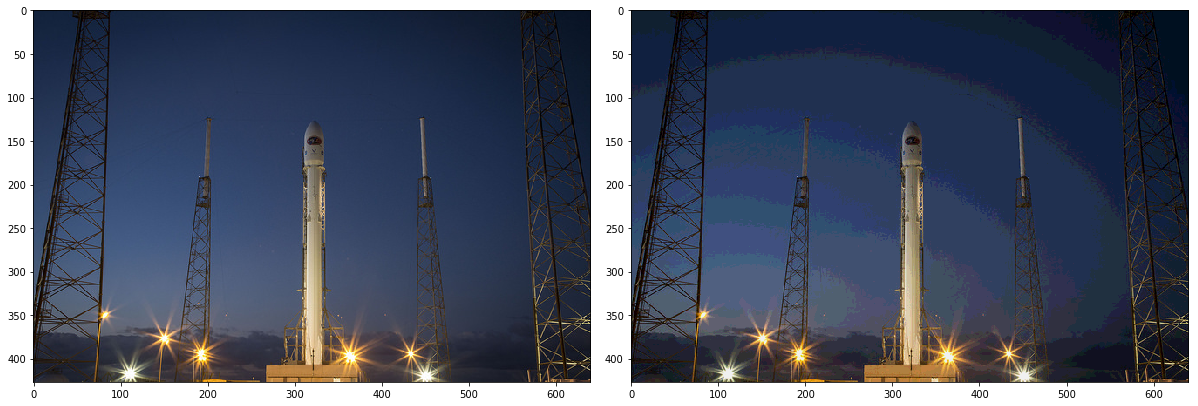

In [3]:
from skimage import data,io
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))

img = data.rocket()
plt.subplot(1,3,1)
io.imshow(img)

print(img[2,2])

img_quantized = img & 0b11110000

print(img_quantized[2,2])

plt.subplot(1,3,2)
io.imshow(img_quantized)

## Rescale image : 
### Rescale operation resizes an image by a given scaling factor.
### The scaling factor can either be a single floating point value, or multiple values - one along each axis.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


Text(0.5,1,'rescaled 1/4')

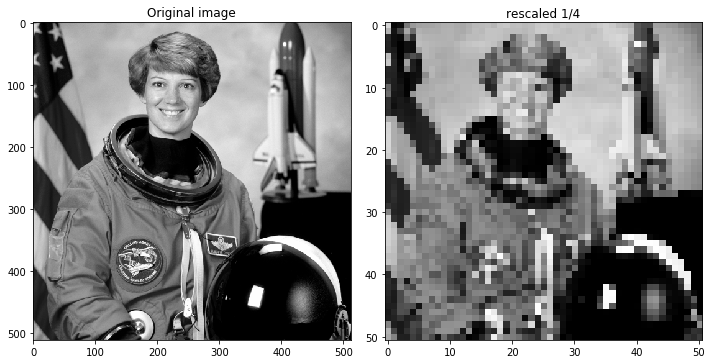

In [10]:
from skimage import data, color
import numpy as np
from skimage.transform import rescale, resize

image = color.rgb2gray(data.astronaut())
image_rescaled = rescale(image, 0.25)
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
io.imshow(image)
plt.title('Original image')

plt.subplot(1, 2, 2)
image_rescaled = rescale(image, 0.1)
io.imshow(image_rescaled)
plt.title('rescaled 1/4')


## Resize Image
### Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor. 
### only integers are allowed as output image size

(512, 512)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Text(0.5,1,'resized 1/4')

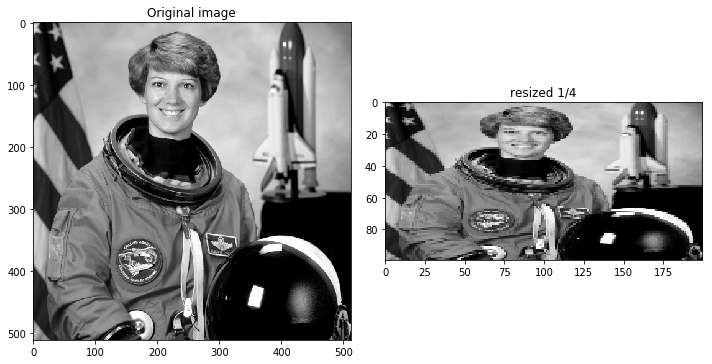

In [11]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
io.imshow(image, cmap='gray')
plt.title('Original image')
print(image.shape)

image_resized = resize(image, (100, 200)) #only integers
#image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 8))

plt.subplot(1, 2, 2)
io.imshow(image_resized, cmap='gray' )
plt.title('resized 1/4')

## 1-D Interpolation

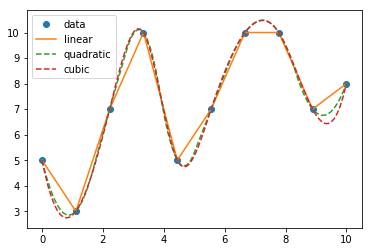

In [6]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, num=10, endpoint=True)
y = [5,3,7,10,5,7,10,10,7,8]
# x and y defines the x and y coordinate for a point

f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic') # second degree polynomial
f3 = interp1d(x,y, kind='cubic')

# num is the number of points between 0 to 10.
xnew = np.linspace(0, 10, num=100, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '--')
plt.legend(['data', 'linear', 'quadratic', 'cubic'], loc='best')
plt.show()

# 2D Interpolation

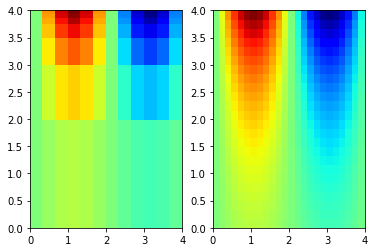

In [12]:
from scipy.interpolate import interp2d
x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
# create a rectangular grid out of an array of x values and an array of y values.
Z = np.sin(np.pi*X/2) * np.exp(Y/2)

x2 = np.linspace(0, 4, 25) 
y2 = np.linspace(0, 4, 25)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z, cmap='jet')
# pcolormesh = pseudocolor plot 

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2, cmap='jet')
plt.show()

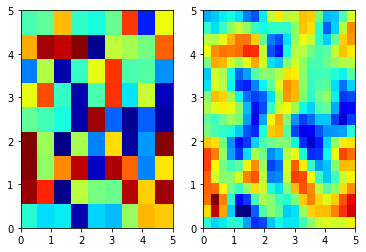

In [8]:
x = np.linspace(0, 5, 10)
y = np.linspace(0, 5, 10)
X, Y = np.meshgrid(x, y)
# create a rectangular grid out of an array of x values and an array of y values.
from random import randrange

Z = np.random.rand(10,10)

x2 = np.linspace(0, 5, 20) 
y2 = np.linspace(0, 5, 20)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z, cmap='jet')
# pcolormesh = pseudocolor plot 

X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2, cmap='jet')
plt.show()

In [9]:
interp2d?

# Thank you